In [1]:
import pandas as pd
import numpy as np
from utilsPtBr import Utils

dataPath = 'data/shortCorpus.csv'
df_uf = pd.read_csv(dataPath, sep=';')
util = Utils()

In [2]:
dictDataframeTreino = {
    "tag": [],
    "text": [],
}

dictDataframeTeste = {
    "tag": [],
    "text": [], 
}

dictDataframeWithoutAnothersTreino = {
    "tag": [],
    "text": [],
}

dictDataframeWithoutAnothersTeste = {
    "tag": [],
    "text": [], 
}


formatTag = {
    "Publicação - Despacho / Decisão": 1,
    "Publicação - Sentença": 2,
    "Publicação - Audiência": 3,
}


In [3]:
from random import randint
def calcTestLineAleatory():
    numberAleatory = randint(0,99);
    if numberAleatory % 9 == 1: 
        return True;W

In [4]:
# pre formatando texto e separando treino e teste
vocabulary = {
    'UNKNOWN': 'UNKNOWN'
}

for i in range (len(df_uf.index)):
    tag = df_uf.loc[i].iloc[1]
    tag = formatTag.get(tag, 0)
  
    text = df_uf.loc[i].iloc[2]
    tokens = util.tokenize(text)
    for tok in set(tokens):
        if any(char.isdigit() for char in tok):
            vocabulary['NUMBER'] = tok
        else:  
            vocabulary[tok] = tok
    #freq = util.getPropoFreq(tokens)
  
    if calcTestLineAleatory():
        dictDataframeTeste['tag'].append(tag)
        dictDataframeTeste['text'].append(tokens)
    else:
        dictDataframeTreino['tag'].append(tag)
        dictDataframeTreino['text'].append(tokens)
    if tag != 0:
        if calcTestLineAleatory():
            dictDataframeWithoutAnothersTeste['tag'].append(tag)
            dictDataframeWithoutAnothersTeste['text'].append(tokens)
        else:
            dictDataframeWithoutAnothersTreino['tag'].append(tag)
            dictDataframeWithoutAnothersTreino['text'].append(tokens)     



In [5]:
vocabulary["UNKNOWN"] = "UNKNOWN"
sizeVocabulary = len(vocabulary.keys())
print('size of vocanulary is ' + str(len(vocabulary.keys())) + ' words!')

word2index = {}
def get_word_2_index(vocab):
    isWord2index = {}
    for i,word in enumerate(vocab):
        if any(char.isdigit() for char in tok):
            isWord2index['NUMBER'] = i 
        else: 
            isWord2index[word] = i
    return isWord2index

word2index = get_word_2_index(vocabulary.keys())

print(word2index["UNKNOWN"])
def text_to_vector(tokens):
    totalUnknow = 0;
    layer = np.zeros(len(vocabulary.keys()),dtype=float)
    for word in tokens:
        index = word2index.get(word, word2index["UNKNOWN"])
        
        if any(char.isdigit() for char in word):
            index = word2index["NUMBER"]

        layer[index] += 1
        if index ==  word2index["UNKNOWN"]:
            totalUnknow += 1
#    if(totalUnknow> 0):        
#        print('total de palavras desconhecidas no vocabulario: ' + str(totalUnknow))

    return np.asarray(layer, dtype=np.int_)

size of vocanulary is 21216 words!
0


In [6]:
textsTreino = []
tagsTreino = []
textsTest = []
tagsTest = []
textsWOTreino = []
tagsWOTreino = []
textsWOTest = []
tagsWOTest = []

for i in range (len(dictDataframeTreino['text'])):
    textsTreino.append(text_to_vector(dictDataframeTreino['text'][i]))
    tagsTreino.append(dictDataframeTreino['tag'][i])

for i in range (len(dictDataframeTeste['text'])):
    textsTest.append(text_to_vector(dictDataframeTeste['text'][i]))
    tagsTest.append(dictDataframeTeste['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTreino['text'])):
    textsWOTreino.append(text_to_vector(dictDataframeWithoutAnothersTreino['text'][i]))
    tagsWOTreino.append(dictDataframeWithoutAnothersTreino['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTeste['text'])):
    textsWOTest.append(text_to_vector(dictDataframeWithoutAnothersTeste['text'][i]))
    tagsWOTest.append(dictDataframeWithoutAnothersTeste['tag'][i])


textsTreino = np.asarray(textsTreino, dtype=np.intc)
tagsTreino = np.asarray(tagsTreino, dtype=np.intc)
textsTest = np.asarray(textsTest, dtype=np.intc)
tagsTest = np.asarray(tagsTest, dtype=np.intc)
textsWOTreino = np.asarray(textsWOTreino, dtype=np.intc)
tagsWOTreino = np.asarray(tagsWOTreino, dtype=np.intc)
textsWOTest = np.asarray(textsWOTest, dtype=np.intc)
tagsWOTest = np.asarray(tagsWOTest, dtype=np.intc)

In [7]:
print('Total de amostras')
print('treino ' + str(len(tagsTreino)))
print('teste ' + str(len(tagsTest)))
print('treino sem outros ' + str(len(tagsWOTreino)))
print('teste sem outros ' + str(len(tagsWOTest)))


Total de amostras
treino 4711
teste 585
treino sem outros 3527
teste sem outros 446


In [8]:

from sklearnClass import SKLRandomForestClassifier, SKLLogisticRegression, SKLExtraTreesClassifier, SKLDecisionTreeClassifier, SKLKNeighborsClassifier

RandomForestClassifier = SKLRandomForestClassifier()
LogisticRegression = SKLLogisticRegression()
ExtraTreesClassifier = SKLExtraTreesClassifier()
DecisionTreeClassifier = SKLDecisionTreeClassifier()
KNeighborsClassifier = SKLKNeighborsClassifier()

Vamos testar diferentes metodos de aprendizado supervisionado da biblioteca sklean e ver como eles se comportam com nossos dados. 

In [9]:
LogisticRegression.fit(textsTreino, tagsTreino)
LogisticRegression.test(textsTest, tagsTest)

score:      73.333%
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       147
           1       0.79      0.70      0.74       187
           2       0.69      0.75      0.72       113
           3       0.91      0.93      0.92       138

    accuracy                           0.73       585
   macro avg       0.73      0.74      0.74       585
weighted avg       0.74      0.73      0.73       585



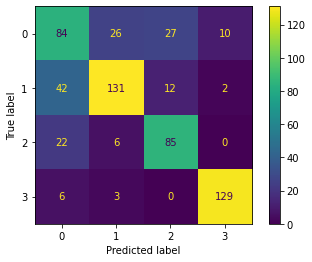

In [10]:
LogisticRegression.getConfusionMatrix(textsTest, tagsTest)

In [11]:
LogisticRegression.fit(textsWOTreino, tagsWOTreino)
LogisticRegression.test(textsWOTest, tagsWOTest)

score:      92.601%
              precision    recall  f1-score   support

           1       0.89      0.92      0.91       172
           2       0.90      0.89      0.90       136
           3       0.99      0.97      0.98       138

    accuracy                           0.93       446
   macro avg       0.93      0.93      0.93       446
weighted avg       0.93      0.93      0.93       446



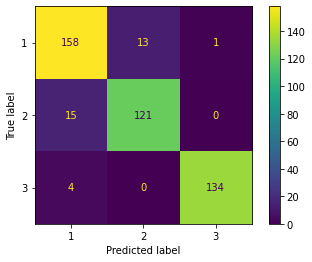

In [12]:
LogisticRegression.getConfusionMatrix(textsWOTest, tagsWOTest)

In [13]:
RandomForestClassifier.fit(textsTreino, tagsTreino)
RandomForestClassifier.test(textsTest, tagsTest)

score:      77.436%
              precision    recall  f1-score   support

           0       0.66      0.48      0.56       147
           1       0.81      0.79      0.80       187
           2       0.72      0.88      0.80       113
           3       0.86      0.98      0.92       138

    accuracy                           0.77       585
   macro avg       0.76      0.78      0.77       585
weighted avg       0.77      0.77      0.76       585



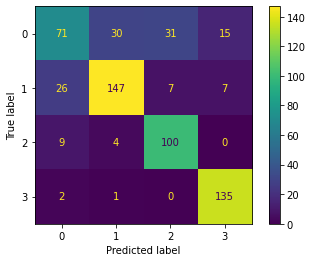

In [14]:
RandomForestClassifier.getConfusionMatrix(textsTest, tagsTest)

In [15]:
RandomForestClassifier.fit(textsWOTreino, tagsWOTreino)
RandomForestClassifier.test(textsWOTest, tagsWOTest)

score:      93.049%
              precision    recall  f1-score   support

           1       0.91      0.91      0.91       172
           2       0.91      0.92      0.92       136
           3       0.97      0.97      0.97       138

    accuracy                           0.93       446
   macro avg       0.93      0.93      0.93       446
weighted avg       0.93      0.93      0.93       446



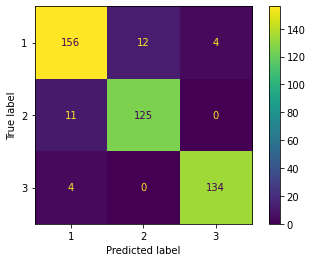

In [16]:
RandomForestClassifier.getConfusionMatrix(textsWOTest, tagsWOTest)

In [17]:
ExtraTreesClassifier.fit(textsTreino, tagsTreino)
ExtraTreesClassifier.test(textsTest, tagsTest)

score:      75.556%
              precision    recall  f1-score   support

           0       0.60      0.50      0.55       147
           1       0.80      0.73      0.76       187
           2       0.72      0.85      0.78       113
           3       0.86      0.99      0.92       138

    accuracy                           0.76       585
   macro avg       0.74      0.77      0.75       585
weighted avg       0.75      0.76      0.75       585



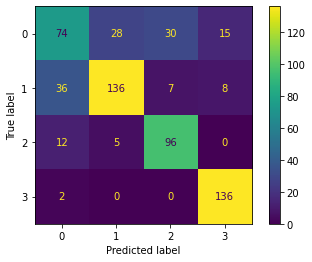

In [18]:
ExtraTreesClassifier.getConfusionMatrix(textsTest, tagsTest)

In [19]:
ExtraTreesClassifier.fit(textsWOTreino, tagsWOTreino)
ExtraTreesClassifier.test(textsWOTest, tagsWOTest)

score:      92.601%
              precision    recall  f1-score   support

           1       0.90      0.91      0.90       172
           2       0.91      0.91      0.91       136
           3       0.98      0.96      0.97       138

    accuracy                           0.93       446
   macro avg       0.93      0.93      0.93       446
weighted avg       0.93      0.93      0.93       446



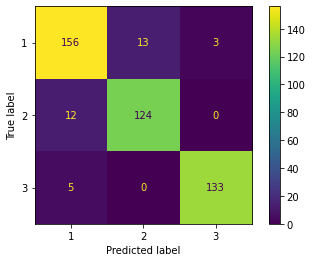

In [20]:
ExtraTreesClassifier.getConfusionMatrix(textsWOTest, tagsWOTest)


score:      69.744%
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       147
           1       0.70      0.68      0.69       187
           2       0.72      0.73      0.72       113
           3       0.85      0.91      0.88       138

    accuracy                           0.70       585
   macro avg       0.70      0.70      0.70       585
weighted avg       0.69      0.70      0.69       585



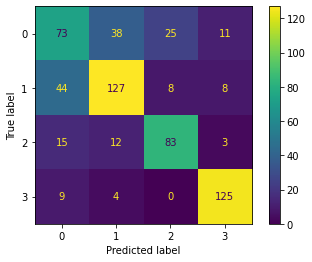

In [21]:
DecisionTreeClassifier.fit(textsTreino, tagsTreino)
DecisionTreeClassifier.test(textsTest, tagsTest)

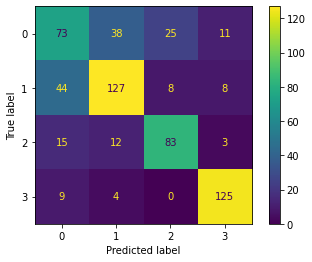

In [22]:
DecisionTreeClassifier.getConfusionMatrix(textsTest, tagsTest)

score:      89.013%
              precision    recall  f1-score   support

           1       0.87      0.88      0.88       172
           2       0.87      0.82      0.84       136
           3       0.94      0.97      0.95       138

    accuracy                           0.89       446
   macro avg       0.89      0.89      0.89       446
weighted avg       0.89      0.89      0.89       446



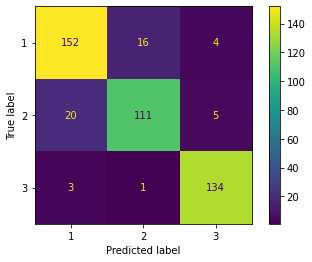

In [23]:
DecisionTreeClassifier.fit(textsWOTreino, tagsWOTreino)
DecisionTreeClassifier.test(textsWOTest, tagsWOTest)

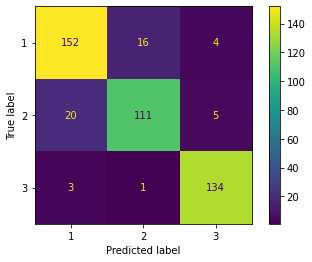

In [24]:
DecisionTreeClassifier.getConfusionMatrix(textsWOTest, tagsWOTest)

In [25]:
KNeighborsClassifier.fit(textsTreino, tagsTreino)
KNeighborsClassifier.test(textsTest, tagsTest)

score:      61.026%
              precision    recall  f1-score   support

           0       0.54      0.48      0.51       147
           1       0.68      0.56      0.61       187
           2       0.64      0.43      0.52       113
           3       0.59      0.96      0.73       138

    accuracy                           0.61       585
   macro avg       0.61      0.61      0.59       585
weighted avg       0.62      0.61      0.60       585



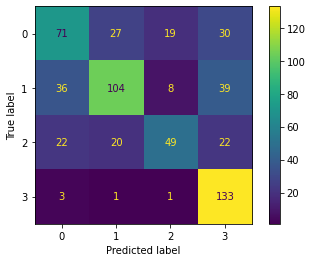

In [26]:
KNeighborsClassifier.getConfusionMatrix(textsTest, tagsTest)

In [27]:
KNeighborsClassifier.fit(textsWOTreino, tagsWOTreino)
KNeighborsClassifier.test(textsWOTest, tagsWOTest)

score:      69.955%
              precision    recall  f1-score   support

           1       0.67      0.63      0.65       172
           2       0.85      0.57      0.68       136
           3       0.65      0.91      0.76       138

    accuracy                           0.70       446
   macro avg       0.72      0.70      0.70       446
weighted avg       0.72      0.70      0.69       446



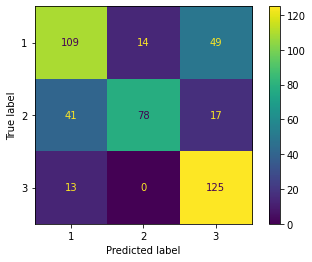

In [28]:
KNeighborsClassifier.getConfusionMatrix(textsWOTest, tagsWOTest)